# Ocean Heat Anomaly


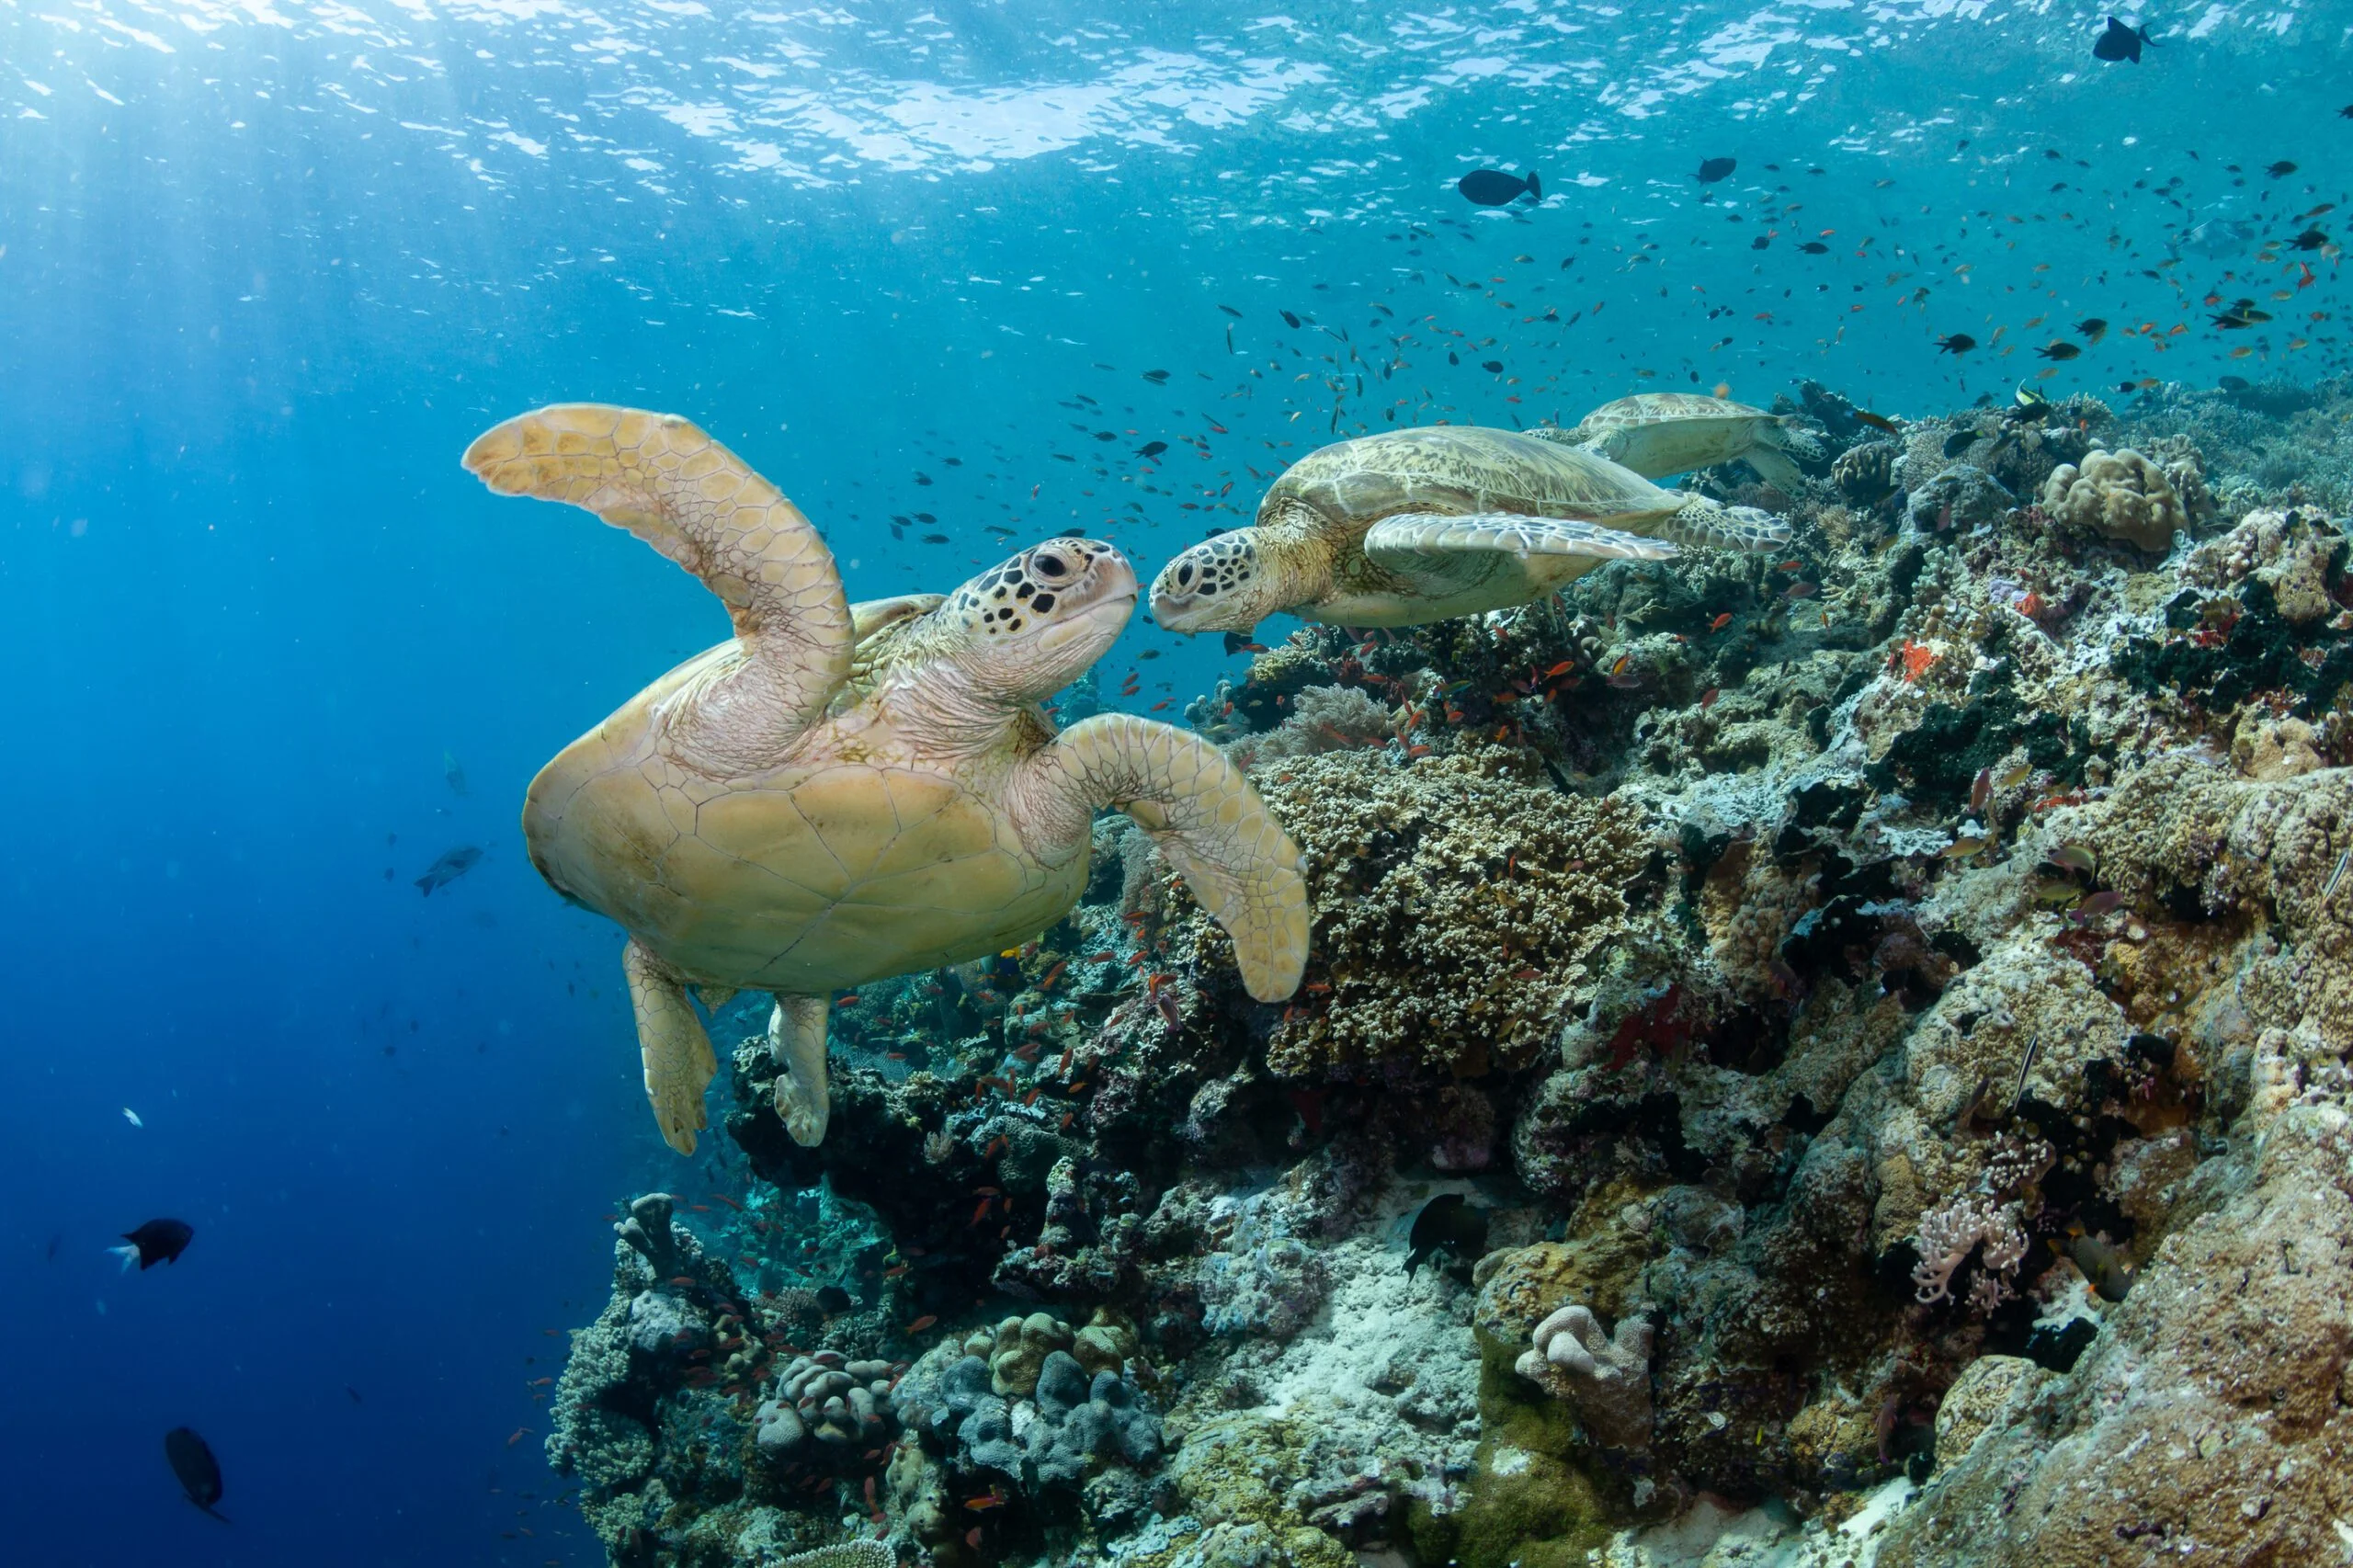

# PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [2]:
# Import dataset
dt = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
dt.head()

,Year,month,heat content anomaly (10^22 Joules)
0,1955,6,-0.112888
1,1956,6,-4.435912
2,1957,6,-5.581200
3,1958,6,-1.357916
4,1959,6,-0.125907


In [3]:
data = dt[['Year','heat content anomaly (10^22  Joules)']]
data.head()

,Year,heat content anomaly (10^22 Joules)
0,1955,-0.112888
1,1956,-4.435912
2,1957,-5.581200
3,1958,-1.357916
4,1959,-0.125907


In [4]:
data.isnull().sum()

Year                                    0
heat content anomaly (10^22  Joules)    0
dtype: int64

In [5]:
print(data[data.duplicated(keep=False)])

Empty DataFrame
Columns: [Year, heat content anomaly (10^22  Joules)]
Index: []


# IForest

In [6]:
# Import dataset
data = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
data_for_IF = data[['Year','heat content anomaly (10^22  Joules)']]
data_for_IF.head()

,Year,heat content anomaly (10^22 Joules)
0,1955,-0.112888
1,1956,-4.435912
2,1957,-5.581200
3,1958,-1.357916
4,1959,-0.125907


In [7]:
model_IF = IsolationForest(contamination=float(0.05))
model_IF.fit(data_for_IF[['heat content anomaly (10^22  Joules)']])
data_for_IF['IF_anomaly_scores'] = model_IF.decision_function(data_for_IF[['heat content anomaly (10^22  Joules)']])
data_for_IF['IF_anomaly'] = model_IF.predict(data_for_IF[['heat content anomaly (10^22  Joules)']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
inliers_IF = data_for_IF[(data_for_IF.IF_anomaly==1)]
inliers_IF

,Year,heat content anomaly (10^22 Joules),IF_anomaly_scores,IF_anomaly
0,1955,-0.112888,0.163580,1
1,1956,-4.435912,0.086971,1
3,1958,-1.357916,0.185862,1
4,1959,-0.125907,0.164761,1
5,1960,-1.150040,0.182475,1
...,...,...,...,...
61,2016,13.076438,0.059248,1
62,2017,16.228298,0.014324,1
63,2018,15.545946,0.028306,1
64,2019,17.515776,0.027632,1


In [9]:
outliers_IF = data_for_IF[(data_for_IF.IF_anomaly==-1)]
outliers_IF

,Year,heat content anomaly (10^22 Joules),IF_anomaly_scores,IF_anomaly
2,1957,-5.581200,-0.009340,-1
15,1970,-5.943489,-0.060561,-1
66,2021,17.946842,-0.007713,-1
67,2022,20.062943,-0.131267,-1


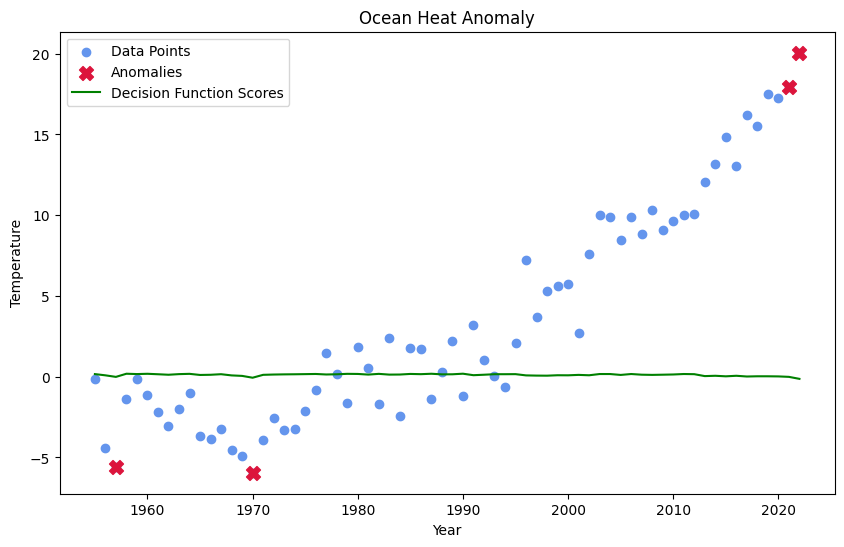

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot data
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(data_for_IF['Year'], data_for_IF['heat content anomaly (10^22  Joules)'], label='Data Points', color='cornflowerblue')

# Plot anomalies detected by Isolation Forest
anomaly_points = data_for_IF[data_for_IF['IF_anomaly'] == -1]
plt.scatter(anomaly_points['Year'], anomaly_points['heat content anomaly (10^22  Joules)'], label='Anomalies', color='Crimson', s=100, marker='X')

# Highlight decision function scores
plt.plot(data_for_IF['Year'], data_for_IF['IF_anomaly_scores'], label='Decision Function Scores', color='green')

# Customize plot
plt.title('Ocean Heat Anomaly')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()

# Show plot
plt.show()


# LOF

In [11]:
# Import dataset
data = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
data_for_LOF = data[['Year','heat content anomaly (10^22  Joules)']]
data_for_LOF.head()

,Year,heat content anomaly (10^22 Joules)
0,1955,-0.112888
1,1956,-4.435912
2,1957,-5.581200
3,1958,-1.357916
4,1959,-0.125907


In [12]:
# Local Outlier Factor
model_LOF = LocalOutlierFactor(n_neighbors=10)  # n_neighbors dapat disesuaikan
data_for_LOF['LOF_anomaly'] = model_LOF.fit_predict(data_for_LOF[['heat content anomaly (10^22  Joules)']])
data_for_LOF['LOF_anomalies_scores'] = model_LOF.negative_outlier_factor_

In [13]:
inliers_LOF = data_for_LOF[(data_for_LOF.LOF_anomaly==1)]
inliers_LOF

,Year,heat content anomaly (10^22 Joules),LOF_anomaly,LOF_anomalies_scores
0,1955,-0.112888,1,-1.083189
1,1956,-4.435912,1,-1.109836
2,1957,-5.581200,1,-1.466771
3,1958,-1.357916,1,-0.977985
4,1959,-0.125907,1,-1.081767
...,...,...,...,...
61,2016,13.076438,1,-1.376655
62,2017,16.228298,1,-1.403932
63,2018,15.545946,1,-1.386212
64,2019,17.515776,1,-1.498727


In [14]:
outliers_IF = data_for_LOF[(data_for_LOF.LOF_anomaly==-1)]
outliers_IF

,Year,heat content anomaly (10^22 Joules),LOF_anomaly,LOF_anomalies_scores
15,1970,-5.943489,-1,-1.621170
66,2021,17.946842,-1,-1.532309
67,2022,20.062943,-1,-1.709570


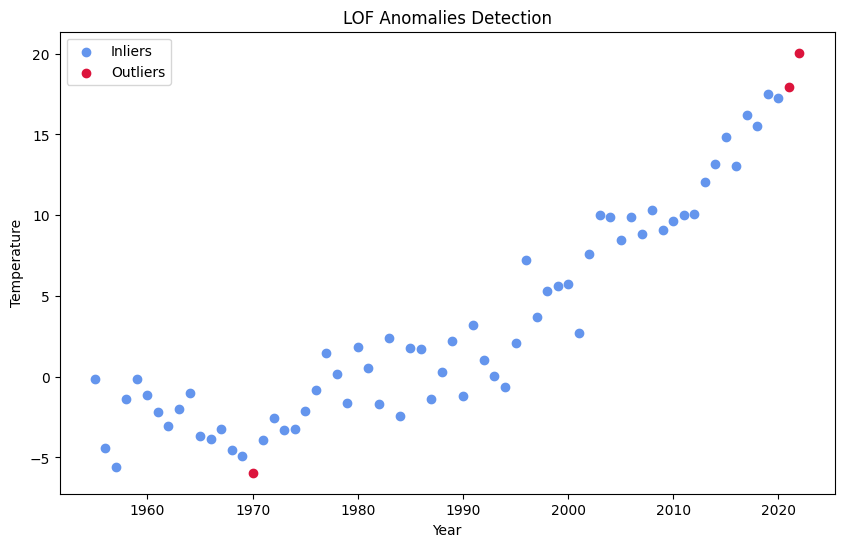

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Visualisasi data LOF
plt.figure(figsize=(10, 6))

# Scatter plot inlier
plt.scatter(inliers_LOF['Year'], inliers_LOF['heat content anomaly (10^22  Joules)'],
            color='cornflowerblue', label='Inliers')

# Scatter plot outlier
plt.scatter(outliers_IF['Year'], outliers_IF['heat content anomaly (10^22  Joules)'],
            color='Crimson', label='Outliers')

plt.title('LOF Anomalies Detection')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# OneClassSVM

In [16]:
# Import dataset
data = pd.read_csv('/content/ohc_levitus_climdash_seasonal.csv')
data_for_SVM = data[['Year', 'heat content anomaly (10^22  Joules)']]
data_for_SVM.head()

,Year,heat content anomaly (10^22 Joules)
0,1955,-0.112888
1,1956,-4.435912
2,1957,-5.581200
3,1958,-1.357916
4,1959,-0.125907


In [17]:
# One-Class SVM
model_SVM = OneClassSVM(nu=0.05)  # nu setara dengan contamination pada Isolation Forest
model_SVM.fit(data_for_SVM[['heat content anomaly (10^22  Joules)']])
data_for_SVM['SVM_anomaly_scores'] = model_SVM.decision_function(data_for_SVM[['heat content anomaly (10^22  Joules)']])
data_for_SVM['SVM_anomaly'] = model_SVM.predict(data_for_SVM[['heat content anomaly (10^22  Joules)']])

In [18]:
inliers_SVM = data_for_SVM[(data_for_SVM.SVM_anomaly==1)]
inliers_SVM

,Year,heat content anomaly (10^22 Joules),SVM_anomaly_scores,SVM_anomaly
0,1955,-0.112888,0.014049,1
1,1956,-4.435912,0.048416,1
2,1957,-5.581200,0.016671,1
3,1958,-1.357916,0.030786,1
4,1959,-0.125907,0.014196,1
...,...,...,...,...
63,2018,15.545946,0.033929,1
64,2019,17.515776,0.055768,1
65,2020,17.286221,0.054816,1
66,2021,17.946842,0.055578,1


In [19]:
outliers_SVM = data_for_SVM[(data_for_SVM.SVM_anomaly==-1)]
outliers_SVM

,Year,heat content anomaly (10^22 Joules),SVM_anomaly_scores,SVM_anomaly
15,1970,-5.943489,-0.000234,-1
28,1983,2.378227,-0.000167,-1
36,1991,3.209013,-0.000207,-1
46,2001,2.730675,-0.000348,-1
53,2008,10.336976,-0.000234,-1


In [20]:
outliers_SVM.shape

(5, 4)

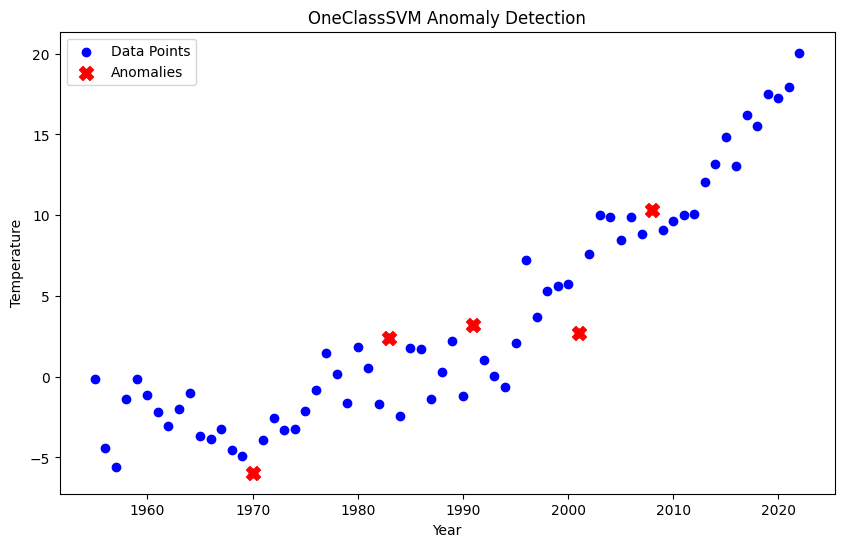

In [21]:
# Plot data
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(data_for_SVM['Year'], data_for_SVM['heat content anomaly (10^22  Joules)'], label='Data Points', color='blue')

# Plot anomalies detected by Isolation Forest
anomaly_points = data_for_SVM[data_for_SVM['SVM_anomaly'] == -1]
plt.scatter(anomaly_points['Year'], anomaly_points['heat content anomaly (10^22  Joules)'], label='Anomalies', color='red', s=100, marker='X')

# Customize plot
plt.title('OneClassSVM Anomaly Detection')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [22]:
# Evaluate Isolation Forest
from sklearn.metrics import precision_score, recall_score, f1_score

true_labels = np.ones(len(data_for_IF))  # 1 for inliers
true_labels[outliers_IF.index] = -1  # -1 for outliers

precision_IF = precision_score(true_labels, data_for_IF['IF_anomaly'])
recall_IF = recall_score(true_labels, data_for_IF['IF_anomaly'])
f1_IF = f1_score(true_labels, data_for_IF['IF_anomaly'])

print(f"Isolation Forest Precision: {precision_IF:.2f}")
print(f"Isolation Forest Recall: {recall_IF:.2f}")
print(f"Isolation Forest F1-score: {f1_IF:.2f}")

# Evaluate Local Outlier Factor
true_labels_LOF = np.ones(len(data_for_LOF))  # 1 for inliers
true_labels_LOF[outliers_IF.index] = -1  # -1 for outliers

precision_LOF = precision_score(true_labels_LOF, data_for_LOF['LOF_anomaly'])
recall_LOF = recall_score(true_labels_LOF, data_for_LOF['LOF_anomaly'])
f1_LOF = f1_score(true_labels_LOF, data_for_LOF['LOF_anomaly'])

print(f"Local Outlier Factor Precision: {precision_LOF:.2f}")
print(f"Local Outlier Factor Recall: {recall_LOF:.2f}")
print(f"Local Outlier Factor F1-score: {f1_LOF:.2f}")

# Evaluate One-Class SVM
true_labels_SVM = np.ones(len(data_for_SVM))  # 1 for inliers
true_labels_SVM[outliers_SVM.index] = -1  # -1 for outliers

precision_SVM = precision_score(true_labels_SVM, data_for_SVM['SVM_anomaly'])
recall_SVM = recall_score(true_labels_SVM, data_for_SVM['SVM_anomaly'])
f1_SVM = f1_score(true_labels_SVM, data_for_SVM['SVM_anomaly'])

print(f"One-Class SVM Precision: {precision_SVM:.2f}")
print(f"One-Class SVM Recall: {recall_SVM:.2f}")
print(f"One-Class SVM F1-score: {f1_SVM:.2f}")


Isolation Forest Precision: 1.00
Isolation Forest Recall: 0.98
Isolation Forest F1-score: 0.99
Local Outlier Factor Precision: 1.00
Local Outlier Factor Recall: 1.00
Local Outlier Factor F1-score: 1.00
One-Class SVM Precision: 1.00
One-Class SVM Recall: 1.00
One-Class SVM F1-score: 1.00


In [23]:
from sklearn.metrics import accuracy_score

# Isolation Forest
IF_accuracy = accuracy_score(true_labels, data_for_IF['IF_anomaly'])

# Local Outlier Factor
LOF_accuracy = accuracy_score(true_labels_LOF, data_for_LOF['LOF_anomaly'])

# One-Class SVM
SVM_accuracy = accuracy_score(true_labels_SVM, data_for_SVM['SVM_anomaly'])

# Menampilkan hasil
print("Isolation Forest Accuracy:", IF_accuracy)
print("Local Outlier Factor Accuracy:", LOF_accuracy)
print("One-Class SVM Accuracy:", SVM_accuracy)


Isolation Forest Accuracy: 0.9852941176470589
Local Outlier Factor Accuracy: 1.0
One-Class SVM Accuracy: 1.0
